<a href="https://colab.research.google.com/github/mohithxoxo/NLP/blob/master/NLP_basic_model_(Emotions_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
!unzip /content/emotions_dataset.zip

Archive:  /content/emotions_dataset.zip
  inflating: test.txt                
  inflating: train.txt               
  inflating: val.txt                 


In [ ]:
train = pd.read_csv('/content/train.txt',sep=';',header=None)
test = pd.read_csv('/content/test.txt',sep=';',header=None)
train = train.rename(columns={0:'text',1:'target'})
test = test.rename(columns={0:'text',1:'target'})

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['target'] = le.fit_transform(train['target'])
test['target'] = le.fit_transform(test['target'])

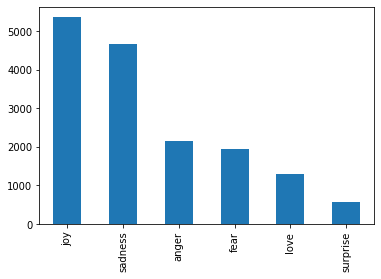

In [ ]:
train['target'].value_counts().plot(kind='bar')

# Preprocessing

In [ ]:
from gensim import utils
import gensim.parsing.preprocessing as gsp
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
train = train.convert_dtypes()
test = test.convert_dtypes()

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
filters = [
           gsp.strip_tags, 
           gsp.strip_punctuation,
           gsp.strip_multiple_whitespaces,
           gsp.strip_numeric,
           gsp.remove_stopwords, 
           gsp.strip_short, 
           gsp.stem_text
          ]

def clean_text(s):
    s = s.lower()
    s = utils.to_unicode(s)
    for f in filters:
        s = f(s)
    return s

In [ ]:
%matplotlib inline
from wordcloud import WordCloud

def plot_word_cloud(text):
    wordcloud_instance = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords=None,
                min_font_size = 10).generate(text) 
             
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud_instance) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

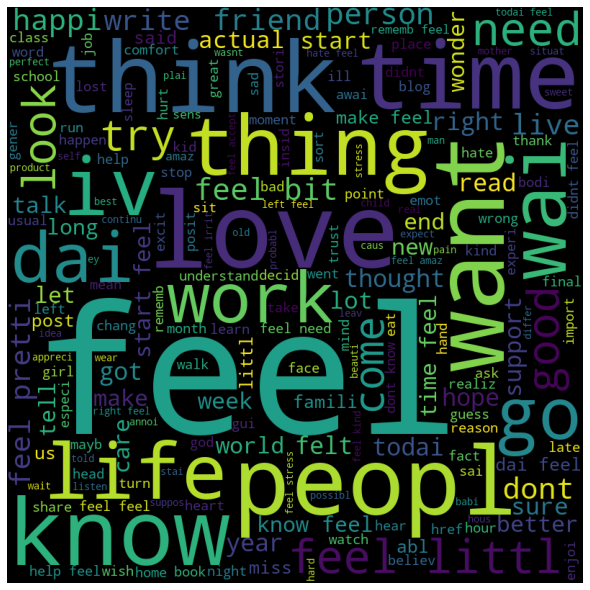

In [ ]:
texts = ''
for index, item in train.iterrows():
    texts = texts + ' ' + clean_text(item['text'])
plot_word_cloud(texts)

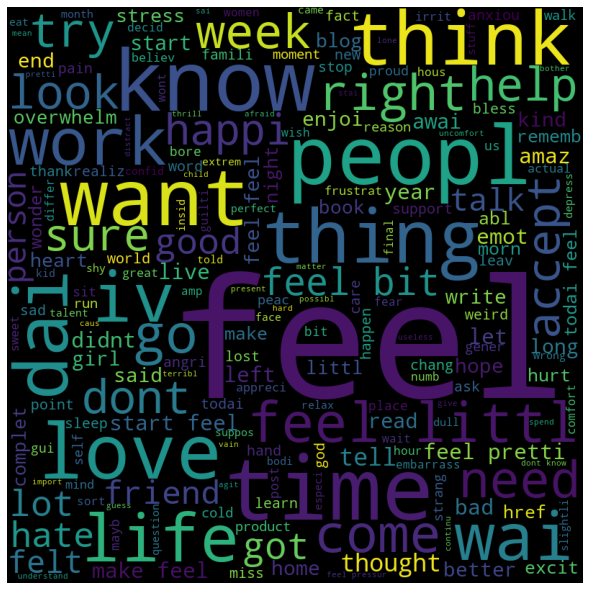

In [ ]:
texts = ''
for index, item in test.iterrows():
    texts = texts + ' ' + clean_text(item['text'])
plot_word_cloud(texts)

In [ ]:
tr_text = train['text']
tr_target = train['target']
te_text = test['text']
te_target = test['target']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

class Text2TfIdfTransformer(BaseEstimator):

    def __init__(self):
        self._model = TfidfVectorizer()
        pass

    def fit(self, df_x, df_y=None):
        df_x = df_x.apply(lambda x : clean_text(x))
        self._model.fit(df_x)
        return self

    def transform(self, df_x):
        return self._model.transform(df_x)

In [ ]:
tfidf_transformer = Text2TfIdfTransformer()
tfidf_vectors = tfidf_transformer.fit(tr_text).transform(tr_text)
tfidf_vectors_te = tfidf_transformer.fit(te_text).transform(te_text)

In [ ]:
print('dimensions:', tfidf_vectors.shape)

dimensions: (16000, 10141)


In [ ]:
print(tfidf_vectors)

# Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score



pl_random_forest_tf_idf = Pipeline(steps=[('tfidf',Text2TfIdfTransformer()),
                                   ('random_forest', RandomForestClassifier())])
scores = cross_val_score(pl_random_forest_tf_idf, tr_text, tr_target, cv=5,scoring='accuracy')

In [ ]:
scores.mean()

0.5014375